<img src=https://i.ytimg.com/vi/knxlmCVFAZI/maxresdefault.jpg>

In [ ]:
#!pip3 install twilio

In [1]:
import os
from twilio.rest import Client
from twilio_config import *
import time

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json


import pandas as pd
import requests
from bs4  import BeautifulSoup
from tqdm import tqdm

from datetime import datetime


# Armado de la URL

In [2]:
query = 'Concepción'
api_key = API_KEY_WAPI

url_clima = 'http://api.weatherapi.com/v1/forecast.json?key='+api_key+'&q='+query+'&days=1&aqi=no&alerts=no'
url_clima

'http://api.weatherapi.com/v1/forecast.json?key=2271dd89e6e14edaace173055230707&q=Concepción&days=1&aqi=no&alerts=no'

In [3]:
response = requests.get(url_clima).json()

In [4]:
response

{'location': {'name': 'Concepción',
  'region': 'Bio-Bio',
  'country': 'Chili',
  'lat': -36.83,
  'lon': -73.05,
  'tz_id': 'America/Santiago',
  'localtime_epoch': 1722880792,
  'localtime': '2024-08-05 13:59'},
 'current': {'last_updated_epoch': 1722879900,
  'last_updated': '2024-08-05 13:45',
  'temp_c': 9.4,
  'temp_f': 49.0,
  'is_day': 1,
  'condition': {'text': 'Patchy rain nearby',
   'icon': '//cdn.weatherapi.com/weather/64x64/day/176.png',
   'code': 1063},
  'wind_mph': 2.5,
  'wind_kph': 4.0,
  'wind_degree': 235,
  'wind_dir': 'SW',
  'pressure_mb': 1020.0,
  'pressure_in': 30.11,
  'precip_mm': 0.12,
  'precip_in': 0.0,
  'humidity': 77,
  'cloud': 57,
  'feelslike_c': 9.5,
  'feelslike_f': 49.0,
  'windchill_c': 9.5,
  'windchill_f': 49.0,
  'heatindex_c': 9.4,
  'heatindex_f': 49.0,
  'dewpoint_c': 5.5,
  'dewpoint_f': 42.0,
  'vis_km': 10.0,
  'vis_miles': 6.0,
  'uv': 3.0,
  'gust_mph': 3.4,
  'gust_kph': 5.5},
 'forecast': {'forecastday': [{'date': '2024-08-05',
 

In [5]:
response.keys()

dict_keys(['location', 'current', 'forecast'])

In [6]:
response['forecast']

{'forecastday': [{'date': '2024-08-05',
   'date_epoch': 1722816000,
   'day': {'maxtemp_c': 10.2,
    'maxtemp_f': 50.4,
    'mintemp_c': 6.1,
    'mintemp_f': 43.0,
    'avgtemp_c': 8.8,
    'avgtemp_f': 47.8,
    'maxwind_mph': 17.7,
    'maxwind_kph': 28.4,
    'totalprecip_mm': 14.59,
    'totalprecip_in': 0.57,
    'totalsnow_cm': 0.0,
    'avgvis_km': 9.8,
    'avgvis_miles': 6.0,
    'avghumidity': 83,
    'daily_will_it_rain': 1,
    'daily_chance_of_rain': 99,
    'daily_will_it_snow': 0,
    'daily_chance_of_snow': 0,
    'condition': {'text': 'Moderate rain',
     'icon': '//cdn.weatherapi.com/weather/64x64/day/302.png',
     'code': 1189},
    'uv': 1.0},
   'astro': {'sunrise': '07:46 AM',
    'sunset': '06:11 PM',
    'moonrise': '08:41 AM',
    'moonset': '07:26 PM',
    'moon_phase': 'Waxing Crescent',
    'moon_illumination': 0,
    'is_moon_up': 0,
    'is_sun_up': 0},
   'hour': [{'time_epoch': 1722830400,
     'time': '2024-08-05 00:00',
     'temp_c': 10.2,
     '

In [7]:
response['forecast']['forecastday'][0].keys()

dict_keys(['date', 'date_epoch', 'day', 'astro', 'hour'])

In [8]:
len(response['forecast']['forecastday'][0]['hour'])

24

In [9]:
response['forecast']['forecastday'][0]['hour'][0]

{'time_epoch': 1722830400,
 'time': '2024-08-05 00:00',
 'temp_c': 10.2,
 'temp_f': 50.4,
 'is_day': 0,
 'condition': {'text': 'Moderate rain',
  'icon': '//cdn.weatherapi.com/weather/64x64/night/302.png',
  'code': 1189},
 'wind_mph': 17.7,
 'wind_kph': 28.4,
 'wind_degree': 357,
 'wind_dir': 'N',
 'pressure_mb': 1012.0,
 'pressure_in': 29.89,
 'precip_mm': 6.11,
 'precip_in': 0.24,
 'snow_cm': 0.0,
 'humidity': 94,
 'cloud': 100,
 'feelslike_c': 7.0,
 'feelslike_f': 44.5,
 'windchill_c': 7.0,
 'windchill_f': 44.5,
 'heatindex_c': 10.2,
 'heatindex_f': 50.4,
 'dewpoint_c': 9.2,
 'dewpoint_f': 48.6,
 'will_it_rain': 1,
 'chance_of_rain': 100,
 'will_it_snow': 0,
 'chance_of_snow': 0,
 'vis_km': 7.0,
 'vis_miles': 4.0,
 'gust_mph': 26.9,
 'gust_kph': 43.3,
 'uv': 0}

In [10]:
response['forecast']['forecastday'][0]['hour'][0]['time'].split()[0]

'2024-08-05'

In [11]:
response['forecast']['forecastday'][0]['hour'][1]['time']

'2024-08-05 01:00'

In [12]:
int(response['forecast']['forecastday'][0]['hour'][1]['time'].split()[1].split(':')[0])

1

In [13]:
response['forecast']['forecastday'][0]['hour'][0]['condition']['text'] #Condition

'Moderate rain'

In [14]:
response['forecast']['forecastday'][0]['hour'][0]['temp_c'] # Temperature

10.2

In [15]:
response['forecast']['forecastday'][0]['hour'][0]['will_it_rain']

1

In [16]:
response['forecast']['forecastday'][0]['hour'][2]['chance_of_rain']

100

# Dataframe - Explo

In [17]:
response.keys()

dict_keys(['location', 'current', 'forecast'])

In [18]:
response['forecast']['forecastday'][0]['hour'][0]

{'time_epoch': 1722830400,
 'time': '2024-08-05 00:00',
 'temp_c': 10.2,
 'temp_f': 50.4,
 'is_day': 0,
 'condition': {'text': 'Moderate rain',
  'icon': '//cdn.weatherapi.com/weather/64x64/night/302.png',
  'code': 1189},
 'wind_mph': 17.7,
 'wind_kph': 28.4,
 'wind_degree': 357,
 'wind_dir': 'N',
 'pressure_mb': 1012.0,
 'pressure_in': 29.89,
 'precip_mm': 6.11,
 'precip_in': 0.24,
 'snow_cm': 0.0,
 'humidity': 94,
 'cloud': 100,
 'feelslike_c': 7.0,
 'feelslike_f': 44.5,
 'windchill_c': 7.0,
 'windchill_f': 44.5,
 'heatindex_c': 10.2,
 'heatindex_f': 50.4,
 'dewpoint_c': 9.2,
 'dewpoint_f': 48.6,
 'will_it_rain': 1,
 'chance_of_rain': 100,
 'will_it_snow': 0,
 'chance_of_snow': 0,
 'vis_km': 7.0,
 'vis_miles': 4.0,
 'gust_mph': 26.9,
 'gust_kph': 43.3,
 'uv': 0}

Fecha

In [19]:
i = 0
fecha = response['forecast']['forecastday'][0]['hour'][i]['time'].split()[0]
fecha

'2024-08-05'

Hora

In [20]:
hora = int(response['forecast']['forecastday'][0]['hour'][i]['time'].split()[1].split(':')[0])
hora

0

Condicion (lluvia/no lluvia)

In [21]:
condicion = response['forecast']['forecastday'][0]['hour'][i]['condition']['text']
condicion

'Moderate rain'

Temperatura

In [22]:
temperatura = response['forecast']['forecastday'][0]['hour'][i]['temp_c']
temperatura

10.2

LLuvia - Will it rain (0/1)

In [23]:
lluvia = response['forecast']['forecastday'][0]['hour'][i]['will_it_rain']
print(lluvia)
prob_lluvia = response['forecast']['forecastday'][0]['hour'][i]['chance_of_rain']
print(prob_lluvia)

1
100


In [24]:
del(i)

# Dataframe

In [25]:
def get_forecast(response,i):
    
    fecha = response['forecast']['forecastday'][0]['hour'][i]['time'].split()[0]
    hora = int(response['forecast']['forecastday'][0]['hour'][i]['time'].split()[1].split(':')[0])
    condicion = response['forecast']['forecastday'][0]['hour'][i]['condition']['text']
    tempe = float(response['forecast']['forecastday'][0]['hour'][i]['temp_c'])
    rain = response['forecast']['forecastday'][0]['hour'][i]['will_it_rain']
    prob_rain = response['forecast']['forecastday'][0]['hour'][i]['chance_of_rain']
    
    return fecha,hora,condicion,tempe,rain,prob_rain

In [26]:
datos = []

for i in tqdm(range(len(response['forecast']['forecastday'][0]['hour'])),colour = 'green'):
    
    datos.append(get_forecast(response,i))
    

100%|██████████| 24/24 [00:00<00:00, 112097.21it/s]


In [27]:
datos

[('2024-08-05', 0, 'Moderate rain', 10.2, 1, 100),
 ('2024-08-05', 1, 'Moderate rain', 10.0, 1, 100),
 ('2024-08-05', 2, 'Light rain shower', 9.6, 1, 100),
 ('2024-08-05', 3, 'Patchy rain nearby', 9.0, 1, 100),
 ('2024-08-05', 4, 'Patchy rain nearby', 9.0, 1, 100),
 ('2024-08-05', 5, 'Patchy rain nearby', 9.1, 1, 100),
 ('2024-08-05', 6, 'Light rain shower', 8.9, 1, 100),
 ('2024-08-05', 7, 'Patchy rain nearby', 8.8, 1, 100),
 ('2024-08-05', 8, 'Patchy rain nearby', 8.7, 1, 100),
 ('2024-08-05', 9, 'Light rain shower', 8.7, 1, 100),
 ('2024-08-05', 10, 'Light rain shower', 9.1, 1, 100),
 ('2024-08-05', 11, 'Light rain shower', 9.2, 1, 100),
 ('2024-08-05', 12, 'Patchy rain nearby', 9.1, 1, 100),
 ('2024-08-05', 13, 'Patchy rain nearby', 9.4, 1, 100),
 ('2024-08-05', 14, 'Patchy rain nearby', 10.0, 1, 78),
 ('2024-08-05', 15, 'Patchy rain nearby', 10.2, 1, 75),
 ('2024-08-05', 16, 'Partly Cloudy ', 10.1, 0, 0),
 ('2024-08-05', 17, 'Partly Cloudy ', 9.5, 0, 0),
 ('2024-08-05', 18, 'Partl

In [28]:
datos[0]

('2024-08-05', 0, 'Moderate rain', 10.2, 1, 100)

In [29]:
col = ['Fecha','Hora','Condicion','Temperatura','Lluvia','prob_lluvia']
df = pd.DataFrame(datos,columns=col)
df = df.sort_values(by = 'Hora',ascending = True)
df

,Fecha,Hora,Condicion,Temperatura,Lluvia,prob_lluvia
0,2024-08-05,0,Moderate rain,10.2,1,100
1,2024-08-05,1,Moderate rain,10.0,1,100
2,2024-08-05,2,Light rain shower,9.6,1,100
3,2024-08-05,3,Patchy rain nearby,9.0,1,100
4,2024-08-05,4,Patchy rain nearby,9.0,1,100
5,2024-08-05,5,Patchy rain nearby,9.1,1,100
6,2024-08-05,6,Light rain shower,8.9,1,100
7,2024-08-05,7,Patchy rain nearby,8.8,1,100
8,2024-08-05,8,Patchy rain nearby,8.7,1,100
9,2024-08-05,9,Light rain shower,8.7,1,100


In [30]:
# data_cli = {
#     'Fecha':datos[0][0],
#     'Hora':datos[1][],
#     'Tiempo':condicion,
#     'Temperatura':tempe,
#     'LLoverá':rain,
#     'prob_lluvia':prob_rain
    
# }

# df = pd.DataFrame(data_cli)
# df = df.sort_values(by = 'Hora',ascending = True)

In [31]:
df[df['Lluvia']==1]

,Fecha,Hora,Condicion,Temperatura,Lluvia,prob_lluvia
0,2024-08-05,0,Moderate rain,10.2,1,100
1,2024-08-05,1,Moderate rain,10.0,1,100
2,2024-08-05,2,Light rain shower,9.6,1,100
3,2024-08-05,3,Patchy rain nearby,9.0,1,100
4,2024-08-05,4,Patchy rain nearby,9.0,1,100
5,2024-08-05,5,Patchy rain nearby,9.1,1,100
6,2024-08-05,6,Light rain shower,8.9,1,100
7,2024-08-05,7,Patchy rain nearby,8.8,1,100
8,2024-08-05,8,Patchy rain nearby,8.7,1,100
9,2024-08-05,9,Light rain shower,8.7,1,100


In [32]:
df_rain =  df[(df['Lluvia']==1) & (df['Hora']>6) & (df['Hora']< 22)]
df_rain = df_rain[['Hora','Condicion']]
df_rain.set_index('Hora', inplace = True)

In [33]:
df['Fecha'][0]

'2024-08-05'

In [34]:
df_rain

,Condicion
Hora,
7,Patchy rain nearby
8,Patchy rain nearby
9,Light rain shower
10,Light rain shower
11,Light rain shower
12,Patchy rain nearby
13,Patchy rain nearby
14,Patchy rain nearby
15,Patchy rain nearby


# Mensaje Template

In [35]:
'\nHola! \n\n\n El pronostico del tiempo hoy '+ df['Fecha'][0] +' en ' + query +' es : \n\n\n ' + str(df_rain)

'\nHola! \n\n\n El pronostico del tiempo hoy 2024-08-05 en Concepción es : \n\n\n                Condicion\nHora                    \n7     Patchy rain nearby\n8     Patchy rain nearby\n9      Light rain shower\n10     Light rain shower\n11     Light rain shower\n12    Patchy rain nearby\n13    Patchy rain nearby\n14    Patchy rain nearby\n15    Patchy rain nearby'

In [36]:
PHONE_NUMBER

'+1 619 568 5691'

# Mensaje SMS desde Twilio

In [32]:
time.sleep(2)
account_sid = TWILIO_ACCOUNT_SID 
auth_token = TWILIO_AUTH_TOKEN

client = Client(account_sid, auth_token)

message = client.messages \
                .create(
                     body='\nHola! \n\n\n El pronostico de lluvia hoy '+ df['Fecha'][0] +' en ' + query +' es : \n\n\n ' + str(df_rain),
                     from_=PHONE_NUMBER,
                     to='+573222007879'
                 )

print('Mensaje Enviado ' + message.sid)

Mensaje Enviado SMbc309ab2afc09ea1f87a7eb64fb8fdda


# Challenge 

* Extrae el valor del dolar en tu país y el top 10 de criptomonedas con su respectiva valoración
* Ahora envia un mensaje diarío a tu Whatsapp usando Twilio

**hint 💡** Investiga que API's gratuitas existen para consultar estos datos



<img src="WhatsApp Image 2022-09-13 at 9.12.18 AM.jpeg" width="200" height="200" />

In [85]:
import pysurfline

# spotId Buchupureo
spotId = "640a4d90e92030fa8aa15c69"

spotforecasts = pysurfline.get_spot_forecasts(
    spotId,
    days=4,
    intervalHours=3,
)

df = spotforecasts.get_dataframe()

In [100]:
df.head()

,timestamp_dt,timestamp_timestamp,probability,utcOffset,surf_min,surf_max,surf_optimalScore,surf_plus,surf_humanRelation,surf_raw_min,...,swells_5_directionMin,swells_5_optimalScore,speed,direction,directionType,gust,optimalScore,temperature,condition,pressure
0,2024-08-05 04:00:00,1722830400,100.000000,-4,1.2,1.5,2,False,Chest to head,1.28496,...,0.000,0,39.41906,23.00634,Offshore,60.56820,2,9.86986,NIGHT_LIGHT_SHOWERS,1015
1,2024-08-05 07:00:00,1722841200,100.000000,-4,1.2,1.5,2,False,Chest to head,1.38859,...,302.170,0,18.96514,334.68478,Cross-shore,30.25110,0,10.39028,NIGHT_LIGHT_RAIN,1015
2,2024-08-05 10:00:00,1722852000,83.777778,-4,1.2,1.5,2,False,Chest to head,1.34714,...,302.745,0,7.56972,238.65546,Onshore,15.12183,2,9.74412,NIGHT_BRIEF_SHOWERS,1016
3,2024-08-05 13:00:00,1722862800,100.000000,-4,1.8,2.4,2,False,Overhead to well overhead,2.36267,...,312.865,0,4.24409,225.85859,Onshore,6.12058,2,9.70342,LIGHT_SHOWERS,1019
4,2024-08-05 16:00:00,1722873600,100.000000,-4,2.4,3.0,2,False,2x overhead,2.54920,...,315.790,0,4.29909,251.40370,Onshore,5.93412,2,9.77014,MOSTLY_CLOUDY,1020


In [107]:
df['timestamp_dt'][0].hour

4

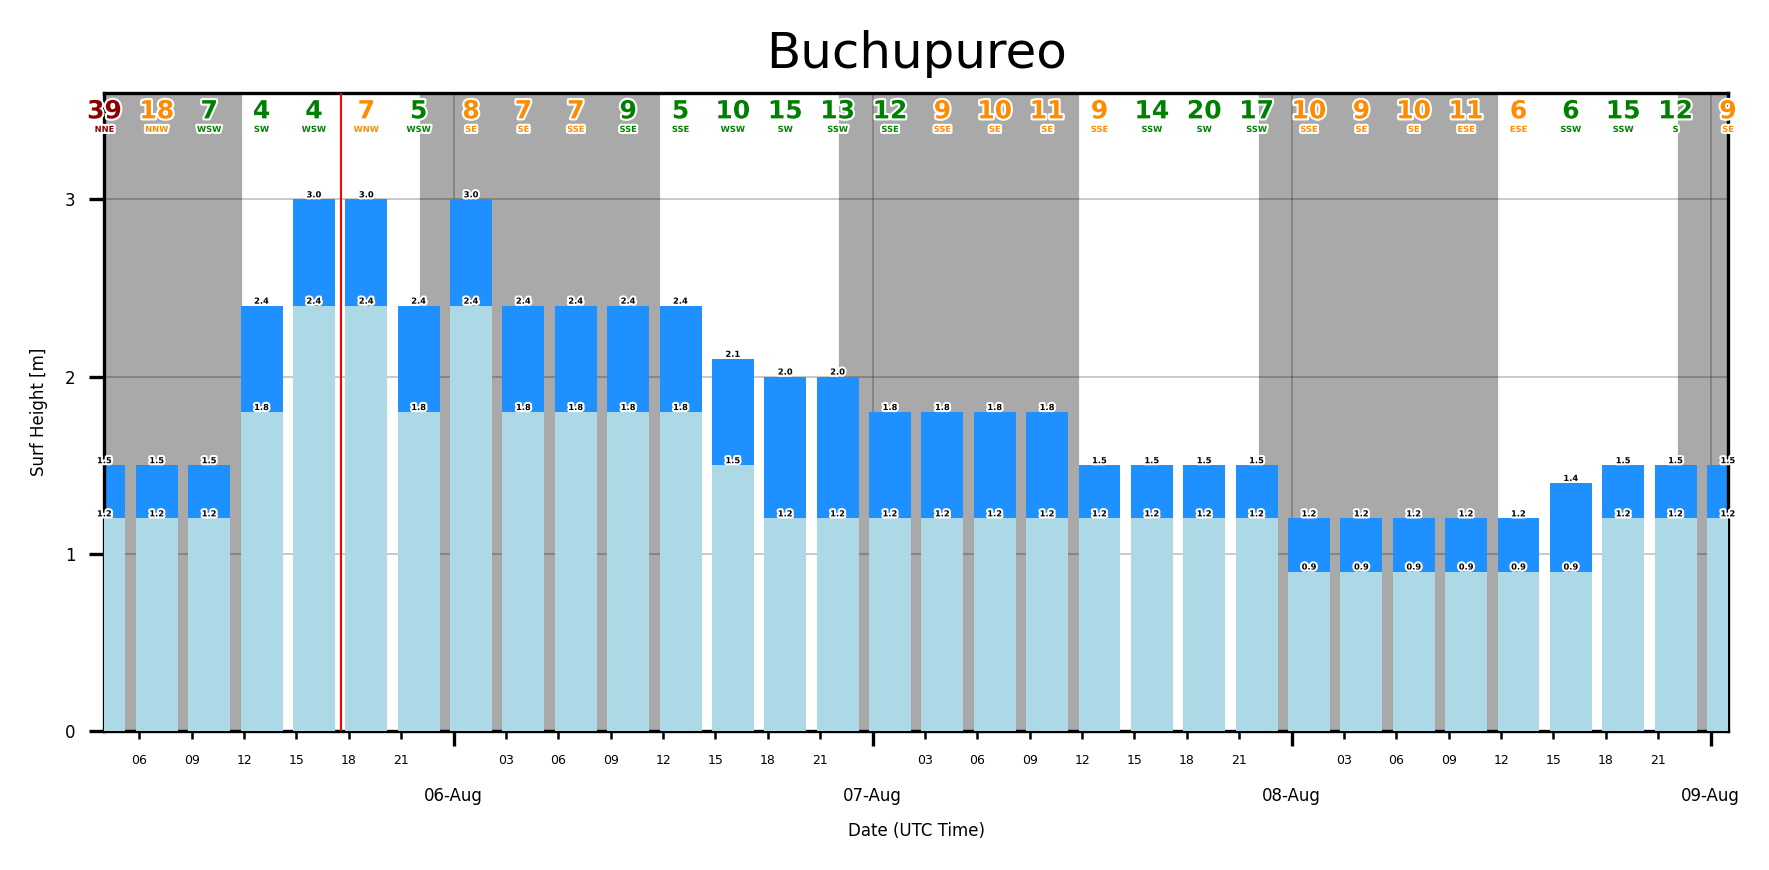

In [113]:
pysurfline.plot_surf_report(
    spotforecasts,
    barLabels=True,
    wind = True
)

In [117]:
wind = 'Offshore'
max_height = 2.5
min_height = 2
sunrise = 8
sunset = 18

In [127]:
sunrise

8

In [147]:
df_sesh = df[
    (df['surf_max'] <= max_height) & (df['surf_max'] >= min_height) &
    (df['timestamp_dt'].dt.hour <= sunset) & (df['timestamp_dt'].dt.hour >= sunrise)
]


In [148]:
df_sesh

,timestamp_dt,timestamp_timestamp,probability,utcOffset,surf_min,surf_max,surf_optimalScore,surf_plus,surf_humanRelation,surf_raw_min,...,swells_5_directionMin,swells_5_optimalScore,speed,direction,directionType,gust,optimalScore,temperature,condition,pressure
3,2024-08-05 13:00:00,1722862800,100.0,-4,1.8,2.4,2,False,Overhead to well overhead,2.36267,...,312.865,0,4.24409,225.85859,Onshore,6.12058,2,9.70342,LIGHT_SHOWERS,1019
10,2024-08-06 10:00:00,1722938400,100.0,-4,1.8,2.4,2,False,Overhead to well overhead,2.20723,...,0.000,0,9.38134,165.68719,Onshore,11.61987,0,6.29861,NIGHT_CLEAR,1026
11,2024-08-06 13:00:00,1722949200,100.0,-4,1.8,2.4,2,False,Overhead to well overhead,1.97925,...,0.000,0,5.70646,160.40712,Onshore,6.94972,2,7.16877,CLEAR,1028
12,2024-08-06 16:00:00,1722960000,100.0,-4,1.5,2.1,2,False,Head to 0.6m overhead,1.90672,...,0.000,0,10.58264,236.51116,Onshore,12.28737,0,8.84226,BRIEF_SHOWERS_POSSIBLE,1027


# Mensaje Twilio

In [149]:
time.sleep(2)
account_sid = TWILIO_ACCOUNT_SID 
auth_token = TWILIO_AUTH_TOKEN

client = Client(account_sid, auth_token)

message = client.messages \
                .create(
                     body='\nHola! \n\n\n Hoy puede salir ola en Buchu ',
                     from_=PHONE_NUMBER,
                     to='+56982091549'
                 )

print('Mensaje Enviado ' + message.sid)

Mensaje Enviado SMfd323d767868921ecf21ec514a09fef6
